<h1 align="center"><font size="10">PROJETO DE DATA SCIENCE - TEIA</font></h1>

<h2 align="center"><font size="5"><i>(Mushroom Classification)</i></font></h2>

<h3 align="center">Cogumelos venenosos?</h1>

<p align="center"><img src="https://raw.githubusercontent.com/thalysonrodrigues/datasets/master/data/mushroom-classification/img/bad.jpg"></p>

<h3 align="center">ou comestíveis?</h1>

<p align="center"><img src="https://raw.githubusercontent.com/thalysonrodrigues/datasets/master/data/mushroom-classification/img/good.jpg"></p>

><p align="center"><i>Dados coletados em <a href="https://www.kaggle.com/uciml/mushroom-classification">Kaggle.com</a> e mantidos versionados em <a href="https://github.com/thalysonrodrigues/datasets">github.com/thaysonrodrigues/datasets</a>. Este conjunto de dados foi originalmente doado ao repositório do UCI Machine Learning. <a href="https://archive.ics.uci.edu/ml/datasets/mushroom">Clique aqui</a> para mais informações.</i></p>

<b>Autores:</b><br>
<i>&nbsp;&nbsp;&nbsp;&nbsp;Thalyson Alexandre Rodrigues de Sousa</i><br>
<i>&nbsp;&nbsp;&nbsp;&nbsp;Lohana dos Santos Tenório</i><br>
<i>&nbsp;&nbsp;&nbsp;&nbsp;Aldo Pereira Riboli</i><br><br>
<b>Docente:</b><br>
<i>&nbsp;&nbsp;&nbsp;&nbsp;Cleyton Slaviero</i>

><h3 align="center">Contexto</h3>

<p>Este é um conjunto de dados extraído do Guia de Campo da Sociedade Audubon para cogumelos norte-americanos no ano de 1981. Este é um dataset que inclui descrições de amostras hipotéticas sobre 23 espécies de cogumelos branqueados nos Cogumelos da Família Agaricus e Lepiota. Cada espécie é identificada como comestível, definitivamente venenosa ou de comestibilidade desconhecida e não recomendada. Esta última classe foi combinada com a venenosa. O Dataset foi doado para UCI ML em 27 de abril de 1987 pelo doador Jeff Schlimmer, porém a extração dos dados foi em Kaggle.com e versionado em github.com/thalysonrodrigues/datasets</p>

><h3 align="center">Problema</h3>

<p>Este é um projeto para a disciplina de TEIA <i>(Tópicos Especiais de Intekigência Artificial - Ciências de Dados)</i> e tem como objetivo resolver a seguinte questão:
</p>
<h2 align="center">Quais características são mais indicativas de um cogumelo venenoso?</h2>
<p>Realizando análises estátisticas para comparar valores que são mais característicos de cogumelos venenosos criando um novo modelo de dados para por fim realizar aprendizado de máquina.</p>

# Análise estátistica sobre os dados

### Neste estudo foi utilizado os seguinte módulos para análise estátistica:

* **[matplotlib](https://matplotlib.org/) - incorporação de gráficos (utilizado por outras libs para plotagem)**
* **[pandas](https://pandas.pydata.org/) - análise, plotagem e operações em tabelas**
* **[numpy](https://numpy.org/) - funções matemáticas, estruturas de tipagem**
* **[seaborn](https://seaborn.pydata.org/) - visualização de dados estátisticos**

In [0]:
# importação das bibliotecas

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

### Observações

Podemos observar que no conjunto de dados abaixo cada característica é denotada por um valor que corresponde a uma letra. Cada letra de acordo com a UCI ML, tem suas propriedades.

In [4]:
# extrair dados de raw.githubusercontent

df = pd.read_csv('https://raw.githubusercontent.com/thalysonrodrigues/datasets/master/data/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
# descrição das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
def length_dataset(df):
  lines, columns = df.shape
  print('Dataset com %s registros e %s colunas.' % (lines, columns))
  
length_dataset(df)

Dataset com 8124 registros e 23 colunas.


### Gráfico de barras do total de características

O gráfico abaixo nos mostra a quantidade de valores possíveis para cada característica da seleção de dados

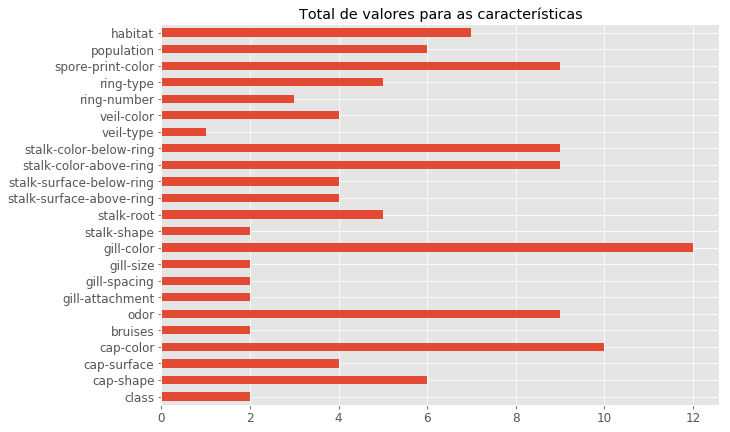

In [7]:
# quantidade de valores únicos para cada característica

num_unique_labels = df.apply(pd.Series.nunique)

num_unique_labels.plot(kind='barh', fontsize='12', figsize=(10,7), title='Total de valores para as características')

### Gráfico de pizza da distribuição de classes

O gráfico abaixo nos dá a perceção do equilibrio entre os registro no conjunto de dados. Desta maneira podemos ver a perceção da quantidade de cogumelos venenosos (classe "p") e cogumelos comestíveis (classe "e").

Cogumelos comestíveis: 4208
Cogumelos venenosos: 3916


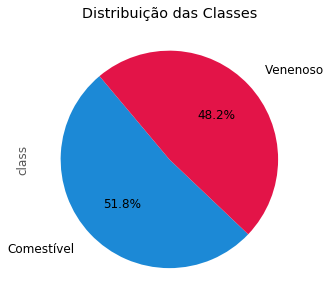

In [8]:
# distribuição das classes (comestível/venenoso)

def distribuition(df):
  df['class'].value_counts().plot(
      x='Tipo',
      y='Quantidade',
      labels={'Comestível':0,'Venenoso':1},
      colors=['#1c89d6', '#e31448'],
      autopct='%1.1f%%',
      startangle=130,
      labeldistance =1.2,
      kind='pie',
      figsize=(5,5),
      fontsize='12',
      title='Distribuição das Classes'
  )
  
  print('Cogumelos comestíveis: %s' % df['class'].value_counts()[0])
  print('Cogumelos venenosos: %s' % df['class'].value_counts()[1])
  
distribuition(df)

In [9]:
# descrevendo o conjunto de dados

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Descrever o conjunto de dados

Cada letra representa uma característica dos cogumelos no conjunto, porém para leitura e análise foi necessário realizar a tradução destes dados mapeando cada valor presente no conjunto com a seguinte constante:

In [0]:
# constante com as características traduzidas em pt-br

FEATURES = {
  # class - classe
  'class': {'p': 1, 'e': 0, 'DESC': 'classe'},

  # cap-shape - forma da tampa
  'cap-shape': {
      'b': 'sino',
      'c': 'cônico',
      'x': 'convexo',
      'f': 'plano',
      'k': 'com botão',
      's': 'afundado',
      'DESC': 'forma da tampa'
  },

  # cap-surface - forma da superfície
  'cap-surface': {'f': 'fibroso', 'g': 'sulcos', 'y': 'escamoso', 's': 'líquido', 'DESC': 'forma da superfície'},

  # cap-color - cor da tampa
  'cap-color': {
      'n': 'marrom',
      'b': 'couro',
      'c': 'canela',
      'g': 'cinza',
      'r': 'verde',
      'p': 'rosa',
      'u': 'roxo',
      'e': 'vermelho',
      'w': 'branco',
      'y': 'amarelo',
      'DESC': 'cor da tampa'
  },

  # bruises - contusões
  'bruises': {'t': 'com hematomas', 'f': 'sem hematomas', 'DESC': 'contusões'},

  # odor - odor
  'odor': {
      'a': 'amêndoa',
      'l': 'anis',
      'c': 'creosoto',
      'y': 'peixe',
      'f': 'falta',
      'm': 'mofo',
      'n': 'nenhum',
      'p': 'pungente',
      's': 'picante',
      'DESC': 'odor'
  },

  # gill-attachment - anexo das brânquias
  'gill-attachment': {'a': 'anexado', 'd': 'decrescente', 'f': 'livre', 'n': 'marcado', 'DESC': 'anexo das brânquias'},

  # gill-spacing - espaçamento das brânquias
  'gill-spacing': {'c': 'fechado', 'w': 'aglomerado', 'd': 'distante', 'DESC': 'espaçamento das brânquias'},

  # gill-size - tamanho das brânquias
  'gill-size': {'b': 'largo', 'n': 'estreito', 'DESC': 'tamanho das brânquias'},

  # gill-color - cor das brânquias
  'gill-color': {
      'k': 'preto',
      'n': 'marrom',
      'b': 'lustre',
      'h': 'chocolate',
      'g': 'cinza',
      'r': 'verde',
      'o': 'laranja',
      'p': 'rosa',
      'u': 'roxo',
      'e': 'vermelho',
      'w': 'branco',
      'y': 'amarelo',
      'DESC': 'cor das brânquias'
  },

  # stalk-shape - caule
  'stalk-shape': {'e': 'ampliação', 't': 'afilando', 'DESC': 'caule'},

  # stalk-root - raiz da haste
  'stalk-root': {
      'b': 'bulbosa',
      'c': 'taco',
      'u': 'copo',
      'e': 'igual',
      'z': 'rizomorfos',
      'r': 'enraizada',
      '?': 'ausente',
      'DESC': 'raiz da haste'
  },


  # stalk-surface-above-ring - caule superfície acima anel
  'stalk-surface-above-ring': {
      'f': 'fibroso',
      'y': 'escamoso',
      'k': 'sedoso',
      's': 'liso',
      'DESC': 'caule superfície acima anel'
  },


  # stalk-surface-below-ring - caule superfície abaixo anel
  'stalk-surface-below-ring': {
      'f': 'fibroso',
      'y': 'escamoso',
      'k': 'sedoso',
      's': 'liso',
      'DESC': 'caule superfície abaixo anel'
  },

  # stalk-color-above-ring - cor da haste acima do anel
  'stalk-color-above-ring': {
      'n': 'marrom',
      'b': 'amarelo',
      'c': 'canela',
      'g': 'cinza',
      'o': 'laranja',
      'p': 'rosa',
      'e': 'vermelho',
      'w': 'branco',
      'y': 'amarelo',
      'DESC': 'cor da haste acima do anel'
  },

  # stalk-color-below-ring - cor da haste abaixo do anel
  'stalk-color-below-ring': {
      'n': 'marrom',
      'b': 'lustre',
      'c': 'canela',
      'g': 'cinza',
      'o': 'laranja',
      'p': 'rosa',
      'e': 'vermelho',
      'w': 'branco',
      'y': 'amarelo',
      'DESC': 'cor da haste abaixo do anel'
  },

  # veil-type - tipo do véu
  'veil-type': {'p': 'parcial', 'u': 'universal', 'DESC': 'tipo do véu'},

  # veil-color - cor do véu
  'veil-color': {'n': 'marrom', 'o': 'laranja', 'w': 'branco', 'y': 'amarelo', 'DESC': 'cor do véu'},

  # ring-number - número do anel
  'ring-number': {'n': 'nenhum', 'o': 'um', 't': 'dois', 'DESC': 'número do anel'},

  # ring-type - tipo do anel
  'ring-type': {
      'c': 'teia de aranha',
      'e': 'evanescente',
      'f': 'queima',
      'l': 'grande',
      'n': 'nenhum',
      'p': 'pendente',
      's': 'revestimento',
      'z': 'zona',
      'DESC': 'tipo do anel'
  },

  # spore-print-color - esporo impressão cor
  'spore-print-color': {
      'k': 'preto',
      'n': 'marrom',
      'b': 'lustre',
      'h': 'chocolate',
      'r': 'verde',
      'o': 'laranja',
      'u': 'roxo',
      'w': 'branco',
      'y': 'amarelo',
      'DESC': 'esporo impressão cor'
  },

  # population - população
  'population': {
      'a': 'abundante',
      'c': 'agrupada', 'n': 'numerosa',
      's': 'dispersa',
      'v': 'várias',
      'y': 'solitária',
      'DESC': 'população'
  },

  # habitat - habitat
  'habitat': {
      'g': 'gramíneas',
      'l': 'folhas',
      'm': 'prados',
      'p': 'caminhos',
      'u': 'urbano',
      'w': 'resíduos',
      'd': 'madeiras',
      'DESC': 'habitat'
  }
}

In [0]:
'''
processar dados com suas características traduzidas para pt-br
'''
def replace_features(df):
  for column in df.columns:
    for key in FEATURES[column]:
      df[column] = df[column].replace(to_replace=key, value=FEATURES[column][key])    

In [12]:
# processa os valores com as características traduzidas

replace_features(df)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convexo,líquido,marrom,com hematomas,pungente,livre,fechado,estreito,preto,ampliação,igual,liso,liso,branco,branco,parcial,branco,um,pendente,preto,dispersa,urbano
1,0,convexo,líquido,amarelo,com hematomas,amêndoa,livre,fechado,largo,preto,ampliação,taco,liso,liso,branco,branco,parcial,branco,um,pendente,marrom,numerosa,gramíneas
2,0,sino,líquido,branco,com hematomas,anis,livre,fechado,largo,marrom,ampliação,taco,liso,liso,branco,branco,parcial,branco,um,pendente,marrom,numerosa,prados
3,1,convexo,escamoso,branco,com hematomas,pungente,livre,fechado,estreito,marrom,ampliação,igual,liso,liso,branco,branco,parcial,branco,um,pendente,preto,dispersa,urbano
4,0,convexo,líquido,cinza,sem hematomas,nenhum,livre,aglomerado,largo,preto,afilando,igual,liso,liso,branco,branco,parcial,branco,um,evanescente,marrom,abundante,gramíneas


In [13]:
# descrevendo as colunas

df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [0]:
# funções criadas para auxiliar na plotagem de gráficos de barra para análise

def autolabel(rects, ax):
  '''Attach a text label above each bar in *rects*, displaying its height.'''
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
  
  return ax


def compare_features(column,
                     title='Comparação entre características',
                     ylabel='Total',
                     w=0.35):
  '''
  Gera um gráfico de barras agrupado com as características dos cogumelos
  assumindo que exista um DataFrame com as classes necessárias 0 e 1
  '''
  labels1 = df[df['class'] == 0][column].value_counts().index
  labels2 = df[df['class'] == 1][column].value_counts().index
  
  values1 = df[df['class'] == 0][column].value_counts().values
  values2 = df[df['class'] == 1][column].value_counts().values

  x1 = np.arange(len(labels1))
  x2 = np.arange(len(labels2))

  fig, ax = plt.subplots(figsize=(7,4))

  rects1 = ax.bar(x1 - w / 2, values1, w, label='Comestível', color='#0d98d9')
  rects2 = ax.bar(x2 + w / 2, values2, w, label='Venenoso', color='#d90d0d')

  fig.tight_layout()
  
  x, labels = (x1, labels1) if len(x1) > len(x2) else (x2, labels2)
  
  ax.set_ylabel(ylabel)
  ax.set_title(FEATURES[column]['DESC'])

  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  
  ax = autolabel(rects1, ax)
  ax = autolabel(rects2, ax)

  ax.legend()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


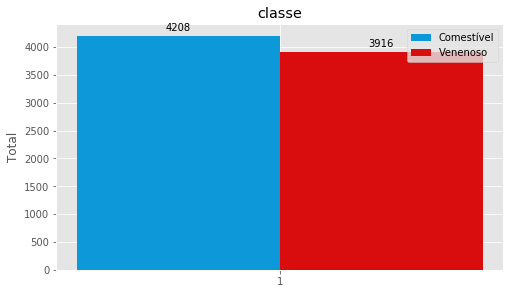

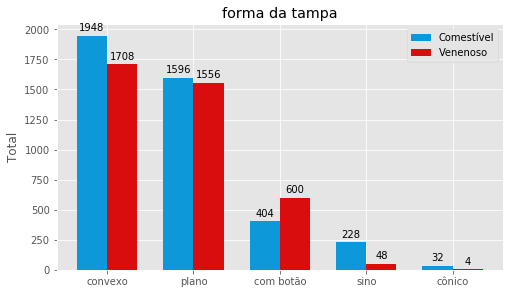

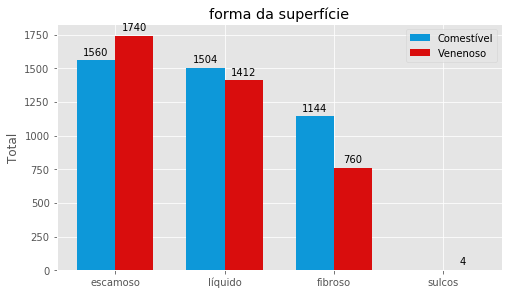

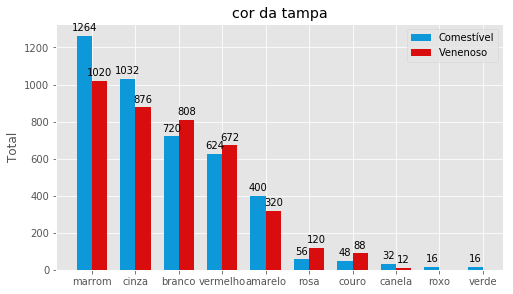

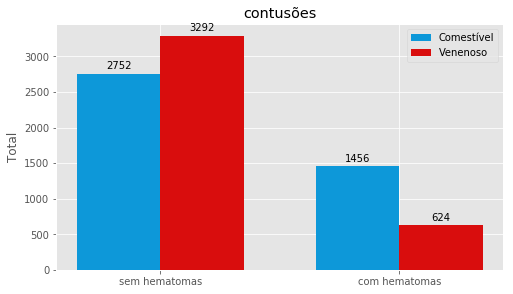

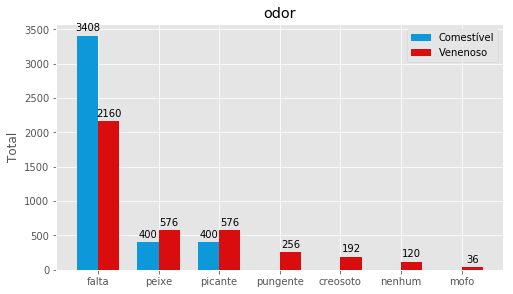

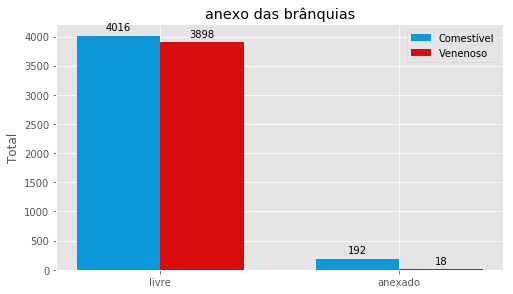

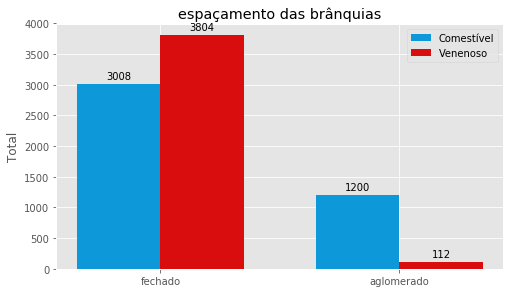

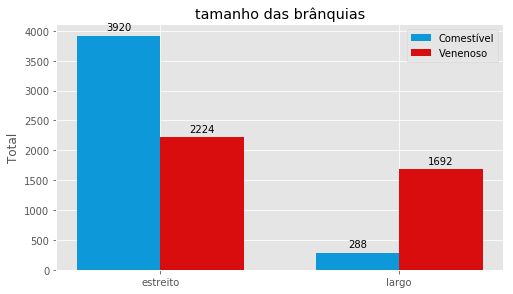

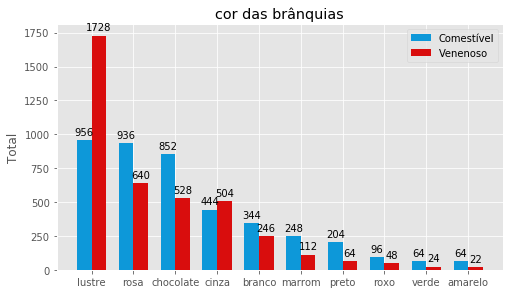

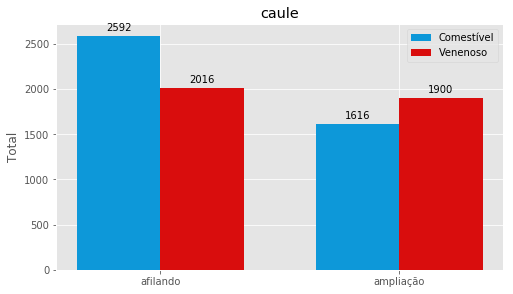

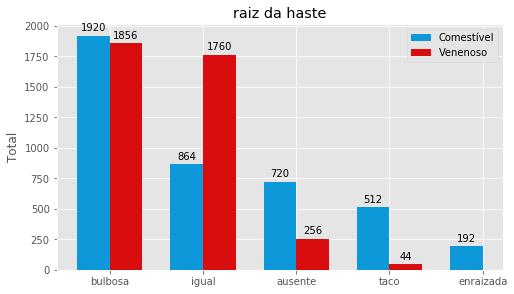

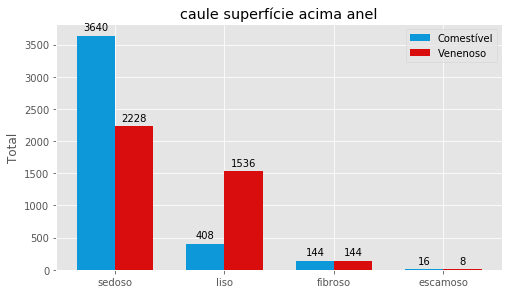

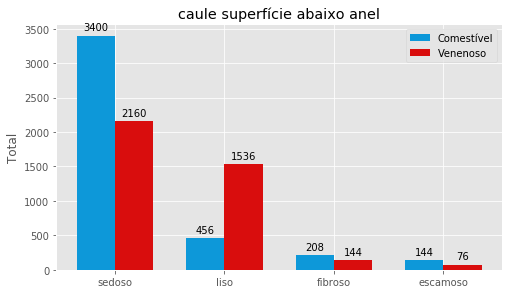

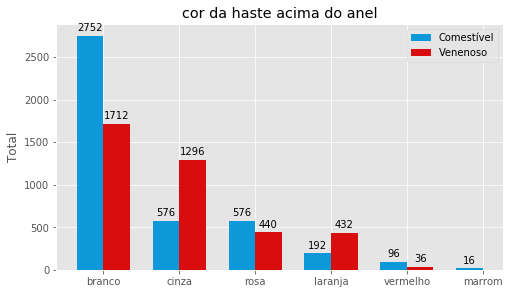

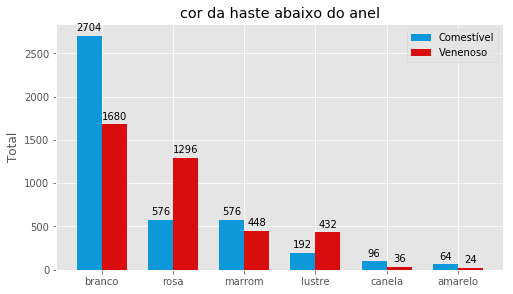

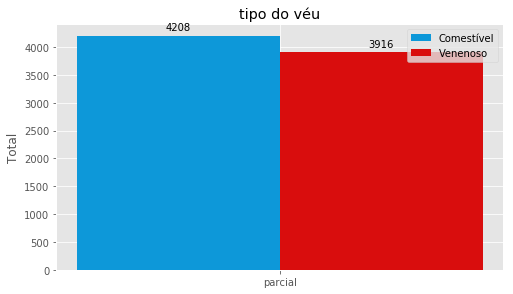

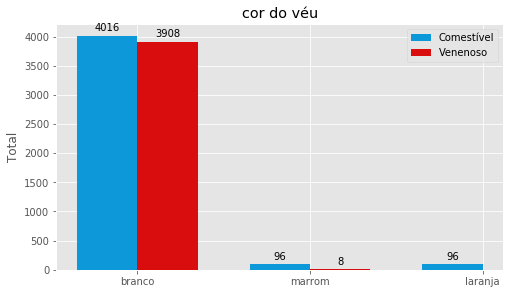

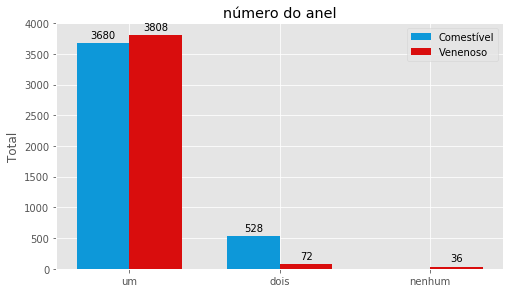

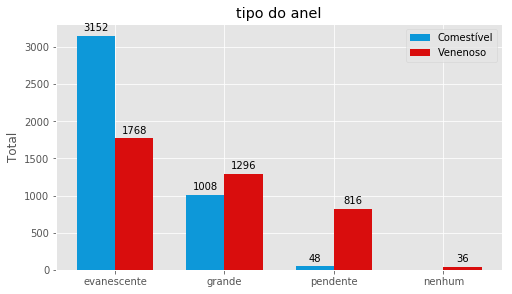

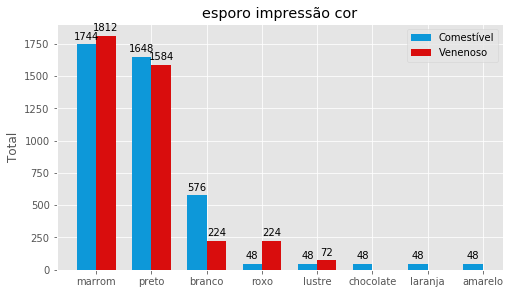

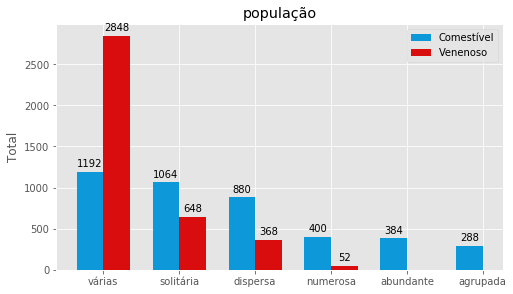

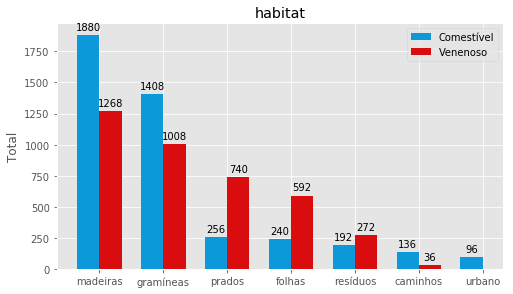

In [15]:
for column in df.columns:
  compare_features(column)
  
plt.show()

### Sanitização de Dados

As seguintes características foram notadas na análise visual:

* A coluna "*stalk-root*", contém dados que foram classifícados como "*?*" e posteriormente como "*ausente*"
* As características com maiores diferenças entre as classes de comestível e venenoso são:
  * **cap-shape** - com botão, sino, cônico
  * **cap-surface** - fibroso
  * **odor** - falta, pungente, creosoto, nenhum, mofo
  * **gill-attachment** - anexado
  * **gill-spacing** - aglomerado
  * **gill-size** - estreito, largo
  * **gill-color** - lustre, rosa, chocolate 
  * **stalk-root** - igual, taco, enraizada
  * **stalk-surface-above-ring** - sedoso, liso
  * **stalk-surface-below-ring** - sedoso, liso
  * **stalk-color-above-ring** - branco, cinza
  * **stalk-color-below-ring** - branco, rosa
  * **ring-number** - dois
  * **ring-type** - evanescence, pendente
  * **habitat** - madeiras, prados, folhas
  
  
Colunas consideradas irrelevantes para análise por terem valores muito bem distribuídos entre as classes:

* **cap-color**
* **veil-type**
* **veil-color**
* **spore-print-color**

In [16]:
# verificar a existência de dados duplicados

df_sanitized = df.drop_duplicates()
df_sanitized.shape

(8124, 23)

In [17]:
# remove todas as linhas que tenham como característica a
# raiz da haste (stalk-root) como ausente

df_sanitized = df_sanitized[df['stalk-root'] != 'ausente']
df_sanitized.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convexo,líquido,marrom,com hematomas,pungente,livre,fechado,estreito,preto,ampliação,igual,liso,liso,branco,branco,parcial,branco,um,pendente,preto,dispersa,urbano
1,0,convexo,líquido,amarelo,com hematomas,amêndoa,livre,fechado,largo,preto,ampliação,taco,liso,liso,branco,branco,parcial,branco,um,pendente,marrom,numerosa,gramíneas
2,0,sino,líquido,branco,com hematomas,anis,livre,fechado,largo,marrom,ampliação,taco,liso,liso,branco,branco,parcial,branco,um,pendente,marrom,numerosa,prados
3,1,convexo,escamoso,branco,com hematomas,pungente,livre,fechado,estreito,marrom,ampliação,igual,liso,liso,branco,branco,parcial,branco,um,pendente,preto,dispersa,urbano
4,0,convexo,líquido,cinza,sem hematomas,nenhum,livre,aglomerado,largo,preto,afilando,igual,liso,liso,branco,branco,parcial,branco,um,evanescente,marrom,abundante,gramíneas


In [18]:
length_dataset(df_sanitized)

Dataset com 5644 registros e 23 colunas.


### Observaçoes

Podemos observar que boa parte dos cogumelos com a característica "raiz do caule" (stalk-root) que tem o valor "ausente" é da classe venenosa.

Cogumelos comestíveis: 3488
Cogumelos venenosos: 2156


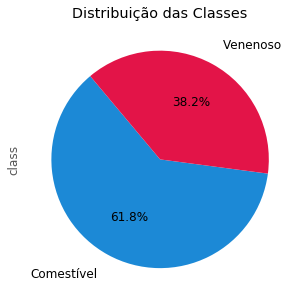

In [19]:
distribuition(df_sanitized)

In [20]:
# remover colunas consideradas irrelevantes para análise
#
# cap-color
# veil-type
# veil-color
# spore-print-color

df_sanitized2 = df_sanitized.drop(['cap-color', 'veil-type', 'veil-color', 'spore-print-color'], axis='columns')

df_sanitized2.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,population,habitat
0,1,convexo,líquido,com hematomas,pungente,livre,fechado,estreito,preto,ampliação,igual,liso,liso,branco,branco,um,pendente,dispersa,urbano
1,0,convexo,líquido,com hematomas,amêndoa,livre,fechado,largo,preto,ampliação,taco,liso,liso,branco,branco,um,pendente,numerosa,gramíneas
2,0,sino,líquido,com hematomas,anis,livre,fechado,largo,marrom,ampliação,taco,liso,liso,branco,branco,um,pendente,numerosa,prados
3,1,convexo,escamoso,com hematomas,pungente,livre,fechado,estreito,marrom,ampliação,igual,liso,liso,branco,branco,um,pendente,dispersa,urbano
4,0,convexo,líquido,sem hematomas,nenhum,livre,aglomerado,largo,preto,afilando,igual,liso,liso,branco,branco,um,evanescente,abundante,gramíneas


In [21]:
length_dataset(df_sanitized2)

Dataset com 5644 registros e 19 colunas.


In [0]:
df_filters = {}

# pegar valores de cap-shape: com botão, sino, cônico

# > 0.953307392996109
df_filter_1 = df[
    (df['cap-shape'] == 'com botão') | 
    (df['cap-shape'] == 'sino') | 
    (df['cap-shape'] == 'cônico')
]

# > 1.0
df_filter_2 = df_sanitized2[
    (df_sanitized2['cap-shape'] == 'com botão') | 
    (df_sanitized2['cap-shape'] == 'sino') | 
    (df_sanitized2['cap-shape'] == 'cônico')
]

df_filters['cap-shape'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de cap-surface: fibroso

# > 0.9461206896551724
df_filter_1 = df[df['cap-surface'] == 'fibroso']

# > 0.9675925925925926
df_filter_2 = df_sanitized2[df_sanitized2['cap-surface'] == 'fibroso']

df_filters['cap-surface'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de odor: falta, pungente, creosoto, nenhum, mofo

# > 0.934412955465587
df_filter_1 = df[
    (df['odor'] == 'falta') | (df['odor'] == 'pungente') | 
    (df['odor'] == 'creosoto') | (df['odor'] == 'nenhum') | 
    (df['odor'] == 'mofo')
]

# > 0.9370485036119711
df_filter_2 = df_sanitized2[
    (df_sanitized2['odor'] == 'falta') | 
    (df_sanitized2['odor'] == 'pungente') | 
    (df_sanitized2['odor'] == 'creosoto') | 
    (df_sanitized2['odor'] == 'nenhum') | 
    (df_sanitized2['odor'] == 'mofo')
]

df_filters['odor'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de gill-attachment: anexado
# > 1.0
df_filter_1 = df[df['gill-attachment'] == 'anexado']

# > 1.0
df_filter_2 = df_sanitized2[df_sanitized2['gill-attachment'] == 'anexado']

df_filters['gill-attachment'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de gill-spacing: aglomerado

# > 0.9885931558935361
df_filter_1 = df[df['gill-spacing'] == 'aglomerado']

# > 1.0
df_filter_2 = df_sanitized2[df_sanitized2['gill-spacing'] == 'aglomerado']

df_filters['gill-spacing'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de gill-size: estreito, largo

# > 0.9095384615384615
df_filter_1 = df[
    (df['gill-size'] == 'estreito') | 
    (df['gill-size'] == 'largo')
]

# > 0.8635961027457927
df_filter_2 = df_sanitized2[
    (df_sanitized2['gill-size'] == 'estreito') | 
    (df_sanitized2['gill-size'] == 'largo')
]

df_filters['gill-size'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de gill-color: lustre, rosa, chocolate

# > 0.9292035398230089
df_filter_1 = df[
    (df['gill-color'] == 'lustre') | 
    (df['gill-color'] == 'rosa') | 
    (df['gill-color'] == 'chocolate')
]

# > 0.8598574821852731
df_filter_2 = df_sanitized2[
    (df_sanitized2['gill-color'] == 'lustre') | 
    (df_sanitized2['gill-color'] == 'rosa') | 
    (df_sanitized2['gill-color'] == 'chocolate')
]

df_filters['gill-color'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de stalk-root: igual, taco, enraizada

# > 0.946524064171123
df_filter_1 = df[
    (df['stalk-root'] == 'igual') | 
    (df['stalk-root'] == 'taco') | 
    (df['stalk-root'] == 'enraizada')
]

# > 0.946524064171123
df_filter_2 = df_sanitized2[
    (df_sanitized2['stalk-root'] == 'igual') | 
    (df_sanitized2['stalk-root'] == 'taco') | 
    (df_sanitized2['stalk-root'] == 'enraizada')
]

df_filters['stalk-root'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de stalk-surface-above-ring: sedoso, liso

# >
df_filter_1 = df[
    (df['stalk-surface-above-ring'] == 'sedoso') | 
    (df['stalk-surface-above-ring'] == 'liso')
]

# >
df_filter_2 = df_sanitized2[
    (df_sanitized2['stalk-surface-above-ring'] == 'sedoso') | 
    (df_sanitized2['stalk-surface-above-ring'] == 'liso')
]

df_filters['stalk-surface-above-ring'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de stalk-surface-below-ring: sedoso, liso

# > 0.9019867549668874
df_filter_1 = df[
    (df['stalk-surface-below-ring'] == 'sedoso') | 
    (df['stalk-surface-below-ring'] == 'liso')
]

# > 0.8668639053254438
df_filter_2 = df_sanitized2[
    (df_sanitized2['stalk-surface-below-ring'] == 'sedoso') | 
    (df_sanitized2['stalk-surface-below-ring'] == 'liso')
]

df_filters['stalk-surface-below-ring'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de stalk-color-above-ring: branco, cinza

# > 0.8442460317460317
df_filter_1 = df[
    (df['stalk-color-above-ring'] == 'branco') | 
    (df['stalk-color-above-ring'] == 'cinza')
]

# > 0.9084791386271871
df_filter_2 = df_sanitized2[
    (df_sanitized2['stalk-color-above-ring'] == 'branco') | 
    (df_sanitized2['stalk-color-above-ring'] == 'cinza')
]

df_filters['stalk-color-above-ring'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de stalk-color-below-ring: branco, rosa

# > 0.8650159744408946
df_filter_1 = df[
    (df['stalk-color-below-ring'] == 'branco') | 
    (df['stalk-color-below-ring'] == 'rosa')
]

# > 0.8536585365853658
df_filter_2 = df_sanitized2[
    (df_sanitized2['stalk-color-below-ring'] == 'branco') | 
    (df_sanitized2['stalk-color-below-ring'] == 'rosa')
]

df_filters['stalk-color-below-ring'] = [df_filter_1, df_filter_2]

In [0]:
# pegar valores de ring-number: dois

# > 1.0
df_filter_1 = df[df['ring-number'] == 'dois']

# > 0.9583333333333334
df_filter_2 = df_sanitized2[df_sanitized2['ring-number'] == 'dois']

df_filters['ring-number'] = [df_filter_1, df_filter_2]

In [35]:
# pegar valores de ring-type - evanescence, pendente

# > 0.9105793450881612
df_filter_1 = df[
    (df['ring-type'] == 'evanescence') | 
    (df['ring-type'] == 'pendente')
]

# > 0.9455587392550143
df_filter_2 = df_sanitized2[
    (df_sanitized2['ring-type'] == 'evanescence') | 
    (df_sanitized2['ring-type'] == 'pendente')
]

df_filters['ring-type'] = [df_filter_1, df_filter_2]

df_filters

{'cap-shape': [      class  cap-shape cap-surface  ... spore-print-color population    habitat
  2         0       sino     líquido  ...            marrom   numerosa     prados
  6         0       sino     líquido  ...             preto   numerosa     prados
  7         0       sino    escamoso  ...            marrom   dispersa     prados
  9         0       sino     líquido  ...             preto   dispersa     prados
  12        0       sino     líquido  ...            marrom   dispersa  gramíneas
  20        0       sino     líquido  ...            marrom   dispersa     prados
  22        0       sino    escamoso  ...            marrom   dispersa     prados
  23        0       sino    escamoso  ...            marrom   numerosa     prados
  24        0       sino     líquido  ...             preto   dispersa     prados
  30        0       sino     líquido  ...            marrom   numerosa     prados
  34        0       sino    escamoso  ...            marrom   dispersa     prados
  3

In [0]:
# pegar valores de habitat - madeiras, prados, folhas

# > 0.9263157894736842
df_filter_1 = df[
    (df['habitat'] == 'madeiras') | 
    (df['habitat'] == 'prados') | 
    (df['habitat'] == 'folhas')
]

# > 0.9859649122807017
df_filter_2 = df_sanitized2[
    (df_sanitized2['habitat'] == 'madeiras') | 
    (df_sanitized2['habitat'] == 'prados') | 
    (df_sanitized2['habitat'] == 'folhas')
]

df_filters['habitat'] = [df_filter_1, df_filter_2]

In [0]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
def split_data(df):
  return np.array(df.drop('class', axis=1)), np.array(df.drop('class', axis=1).columns), np.array(['venenoso', 'comestível']), df['class'].values

In [0]:
def gaussian(df):
  data, feature_names, target_names, target = split_data(df)

  # transformar todos os valores string em valores numéricos para processar o
  # modelo de dados com LabelEncoder
  labelencoder = LabelEncoder()

  for i in range(0, len(data), 1):
    data[i] = labelencoder.fit_transform(data[i])
  
  # dividir os dados para treino e teste
  train, test, train_labels, test_labels = train_test_split(data, target, test_size=0.20, random_state=42)
  
  # modelo preditivo Gaussiano com Naive Bayes
  gnb = GaussianNB()

  model = gnb.fit(train, train_labels)
  
  preds = gnb.predict(test)
  
  # testar precisão do modelo
  accuracy = accuracy_score(test_labels, preds)

  print('Acurácia do modelo: %s\n' % accuracy)
  print('Matriz de confusão: \n%s\n' % confusion_matrix(test_labels, preds))
  print('Relatório da classificação: \n\n', classification_report(test_labels, preds))
  
  return accuracy

### Observações

Após a filtragem de diversos dados que são considerados irrelevantes por terem uma distribuição parecida, foi aplicado o algortimo preditivo Gaussian. Pode-se observar que a acurácia é melhorada na maioria das colunas que não foram filtradas com a sanitização de dados (remoção de 4 colunas e registros que contém "?" ou "ausente" na coluna "**stalk-root**")

Acurácia do modelo: 0.9494163424124513

Matriz de confusão: 
[[132   0]
 [ 13 112]]

Relatório da classificação: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       132
           1       1.00      0.90      0.95       125

    accuracy                           0.95       257
   macro avg       0.96      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257

Acurácia do modelo: 0.9852941176470589

Matriz de confusão: 
[[54  1]
 [ 0 13]]

Relatório da classificação: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.93      1.00      0.96        13

    accuracy                           0.99        68
   macro avg       0.96      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68

Dados sanitizados - cap-shape:  0.9852941176470589


Acurácia do modelo: 0.9547413793103449

Matriz de confusão: 
[[29

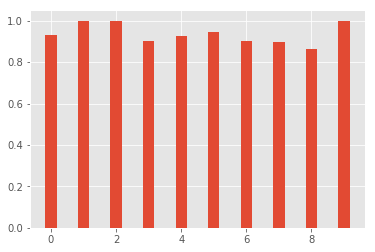

In [40]:
without_sanitize = []
with_sanitize = []

for value in df_filters:
  # testar modelo gaussiano para valores
  before = gaussian(df_filters[value][0])
  after  = gaussian(df_filters[value][1])
  
  # comparar valores da acurácia antes da sanitização e depois da sanitização
  if before >= after:
    without_sanitize.append(before)
    print('Dados completos - ' + value + ': ', before)
    print('\n')
  else:
    with_sanitize.append(after)
    print('Dados sanitizados - ' + value + ': ', after)
    print('\n')

    
if len(without_sanitize) < len(with_sanitize):
  data = with_sanitize
  print('A precisão foi melhorada com a sanitização dos dados')
else:
  data = without_sanitize
  print('A precisão é melhor quando se tem todas as 23 colunas')
  

ind = np.arange(len(data))

p = plt.bar(ind, data, 0.35)

plt.show()

### Observações

Pode-se observar que as colunas gill-attachment, gill-spacing e ring-number com dados completos obtiveram 1.0 de precisão.

Estes que combinados obtém a acurácia de:

Cogumelos comestíveis: 1632
Cogumelos venenosos: 202
Acurácia do modelo: 0.9346049046321526

Matriz de confusão: 
[[303  19]
 [  5  40]]

Relatório da classificação: 

               precision    recall  f1-score   support

           0       0.98      0.94      0.96       322
           1       0.68      0.89      0.77        45

    accuracy                           0.93       367
   macro avg       0.83      0.91      0.87       367
weighted avg       0.95      0.93      0.94       367



0.9346049046321526

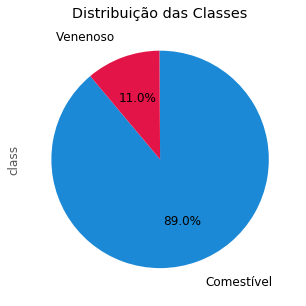

In [41]:
final_filter = df[(df['gill-attachment'] == 'anexado') | (df['gill-spacing'] == 'aglomerado') | (df['ring-number'] == 'dois')]

distribuition(final_filter)
gaussian(final_filter)

In [43]:
gaussian(df_sanitized2)

Acurácia do modelo: 0.8627103631532329

Matriz de confusão: 
[[695  10]
 [145 279]]

Relatório da classificação: 

               precision    recall  f1-score   support

           0       0.83      0.99      0.90       705
           1       0.97      0.66      0.78       424

    accuracy                           0.86      1129
   macro avg       0.90      0.82      0.84      1129
weighted avg       0.88      0.86      0.86      1129



0.8627103631532329

In [44]:
gaussian(df)

Acurácia do modelo: 0.9003076923076923

Matriz de confusão: 
[[822  21]
 [141 641]]

Relatório da classificação: 

               precision    recall  f1-score   support

           0       0.85      0.98      0.91       843
           1       0.97      0.82      0.89       782

    accuracy                           0.90      1625
   macro avg       0.91      0.90      0.90      1625
weighted avg       0.91      0.90      0.90      1625



0.9003076923076923